# Offline Model Comparison – Naïve Baselines vs XGBoost vs TFT 

**Goal:**  
Evaluate and compare forecasting performance on the same test period using:
- Naïve Baselines (Weekly & Daily)
- XGBoost
- Temporal Fusion Transformer

**Evaluation type:** Offline / historical backtest  
**Metric focus:** Metric Performance + stability + error behavior

**Author:** Rodrigo Amorim

## Import the necessary libraries and load the data

In [ ]:
import numpy as np
import pandas as pd
import mlflow
import os
import matplotlib.pyplot as plt 

from sklearn.metrics import (
mean_absolute_error,
root_mean_squared_error,
mean_absolute_percentage_error
)

In [5]:
# Import the processed dataset
df = pd.read_parquet(r'C:\Users\rodri\Desktop\Energy_Consumption_Forecasting\End-to-End_Energy_Consumption_Forecasting\Data\Processed/GermanEnergyConsumption.parquet')

# Timestamps for the plots  
df2 = df.reset_index()
df2 = df2[df2["Date"] >= "2019"]
timestamps = df2["Date"].values

In [11]:
# Load the previously obtained results
# Predictions
y_pred_daily = np.load(r"C:\Users\rodri\Desktop\Energy_Consumption_Forecasting\End-to-End_Energy_Consumption_Forecasting\Results\y_pred_daily.npy")
y_pred_weekly = np.load(r"C:\Users\rodri\Desktop\Energy_Consumption_Forecasting\End-to-End_Energy_Consumption_Forecasting\Results\y_pred_weekly.npy")
y_pred_XGBoost = np.load(r"C:\Users\rodri\Desktop\Energy_Consumption_Forecasting\End-to-End_Energy_Consumption_Forecasting\Results\y_pred_XGBoost.npy")
y_pred_TFT = np.load(r"C:\Users\rodri\Desktop\Energy_Consumption_Forecasting\End-to-End_Energy_Consumption_Forecasting\Results\y_pred_TFT.npy")

# Results
y_true = np.load(r"C:\Users\rodri\Desktop\Energy_Consumption_Forecasting\End-to-End_Energy_Consumption_Forecasting\Results\y_true.npy")

## Metric computation and relevant plots 

In [ ]:
# Metrics calculation 
def metrics(y_true, y_pred):

    return {
        "MAE" : mean_absolute_error(y_true, y_pred),
        "RMSE" : root_mean_squared_error(y_true, y_pred),
        "MAP" : mean_absolute_percentage_error(y_true, y_pred)    
    }

results = pd.DataFrame({
    "Naïve daily" : metrics(y_true, y_pred_daily),
    "Naïve weekly" : metrics(y_true, y_pred_weekly),
    "XGBoost" : metrics(y_true, y_pred_XGBoost),
    "TFT" : metrics(y_true, y_pred_TFT)
}).T

# Present the results
results 

,MAE,RMSE,MAP
Naïve daily,4557.509589,6943.967618,0.083276
Naïve weekly,2558.004795,4464.935632,0.047352
XGBoost,450.492610,598.236695,0.008215
TFT,2327.096491,3232.656980,0.042626


**Analysis:**

From the table above it is clear that the best model, performance metrics wise, is the XGBoost model, followed by the TFT model. Additionally, it is relevant to point out that the XGBoost and TFT models outperformed the Naïve baselines, showcasing that the models learned more than just seasonality. They were able to identify nonlinear relationships, interactions between variables and context-dependent deviations (e.g., weekdays vs weekends, seasonal load shape changes).


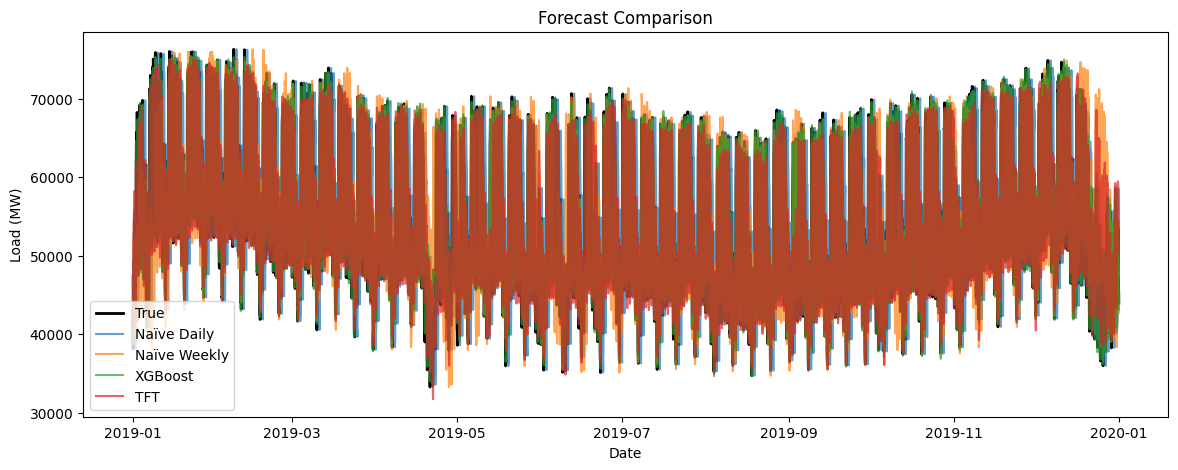

In [14]:
# Forecast Plots
plt.figure(figsize = (14,5))
plt.plot(timestamps, y_true, label = "True", color = "black", linewidth = 2)
plt.plot(timestamps, y_pred_daily, label = "Naïve Daily", alpha = 0.7)
plt.plot(timestamps, y_pred_weekly, label = "Naïve Weekly", alpha = 0.7)
plt.plot(timestamps, y_pred_XGBoost, label = "XGBoost", alpha = 0.7)
plt.plot(timestamps, y_pred_TFT, label = "TFT", alpha = 0.7)
plt.legend()
plt.ylabel("Load (MW)")
plt.xlabel("Date")
plt.title("Forecast Comparison")
plt.show()


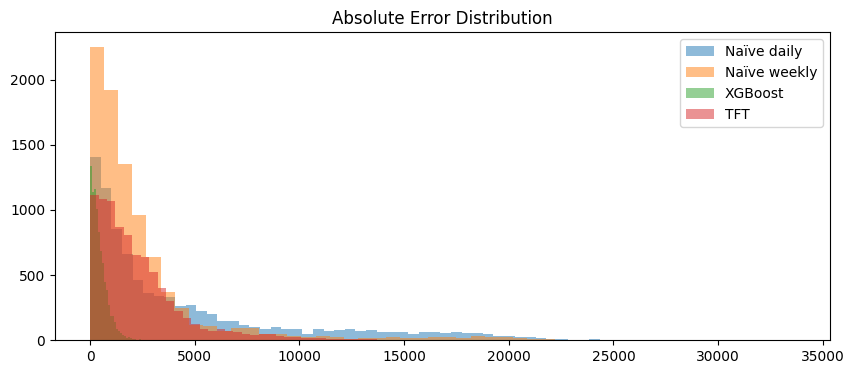

In [17]:
# Absolute Error Distribution analysis 

plt.figure(figsize = (10,4))
plt.hist(np.abs(y_true - y_pred_daily), bins = 50, alpha = 0.5, label = "Naïve daily")
plt.hist(np.abs(y_true - y_pred_weekly), bins = 50, alpha = 0.5, label = "Naïve weekly")
plt.hist(np.abs(y_true - y_pred_XGBoost), bins = 50, alpha = 0.5, label = "XGBoost")
plt.hist(np.abs(y_true - y_pred_TFT), bins = 50, alpha = 0.5, label = "TFT")
plt.legend()
plt.title("Absolute Error Distribution")
plt.show()

## Conclusion

- **Best overall performance:** XGBoost
- **Easiest Applicability:** XGBoost
- **Strong baseline:** Naïve is competitive for short horizons with a performance comparible with the TFT model

### Recommendation
- Use XGBoost for german electricity forecasting (Considering a context of low computational resources)

### Final comment 
The performance difference of the TFT model compared to the XGBoost model, can be attributed to two main factors. First, the hyperparameter optimization for the TFT was conducted using a smaller number of trials, potentially limiting the model’s capacity to reach optimal configurations. Second, unlike XGBoost, the TFT was not retrained during the rolling inference process, relying instead on a fixed model trained offline. This highlights the TFT’s dependence on learned seasonal representations rather than short-term recalibration.

